<a href="https://colab.research.google.com/github/gprasads/Fraud-Detection/blob/master/CSE519_HW2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd

# Importing the dataset
transactions = pd.read_csv('/content/drive/My Drive/dsf_hw2/train_transaction.csv')
identities = pd.read_csv('/content/drive/My Drive/dsf_hw2/train_identity.csv')
dataset = pd.merge(identities[['TransactionID', 'DeviceType','DeviceInfo']], transactions[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','isFraud']],on='TransactionID',how='outer')


In [0]:
#addressing missing values
for i in ['dist2','TransactionAmt']:
  dataset[i].fillna((dataset[i].mean()), inplace=True)
for i in ['P_emaildomain','R_emaildomain','card4','card6','ProductCD','DeviceType','addr2','addr1','DeviceInfo']:
  dataset[i].fillna('Not Given',inplace=True)
for i in []:
  dataset[i].fillna(0, inplace=True)
  
  
dataset

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

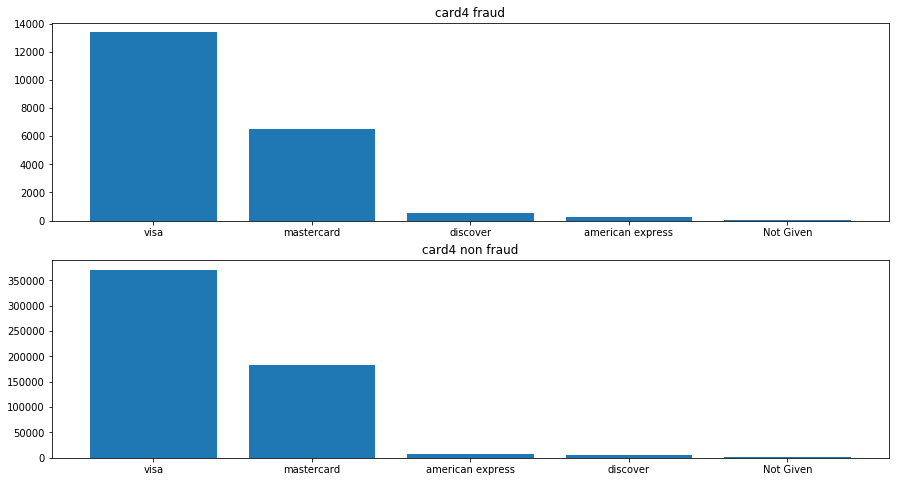

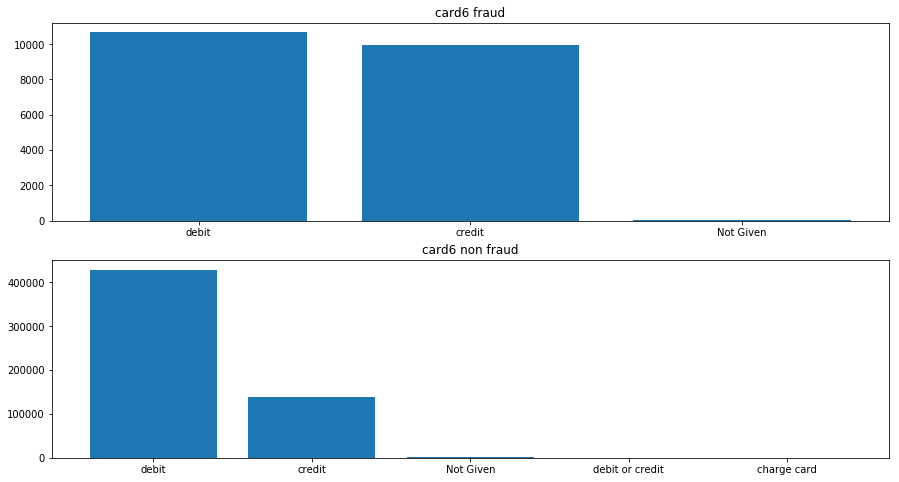

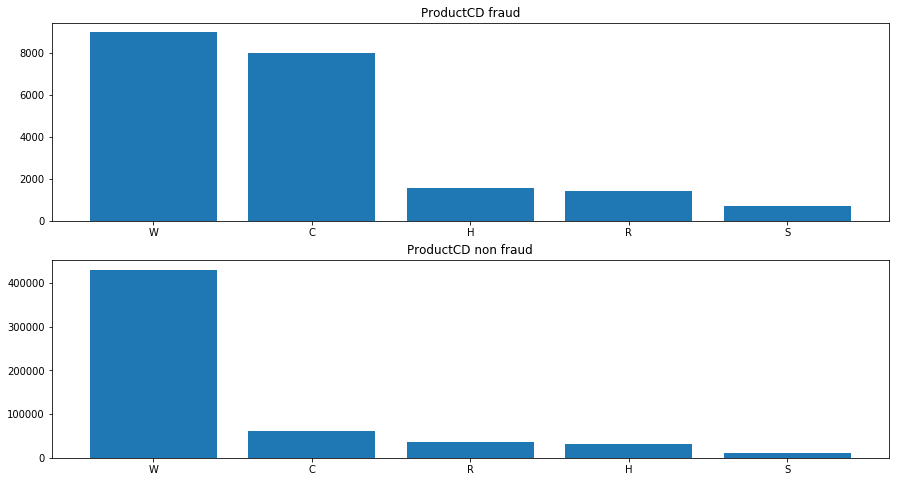

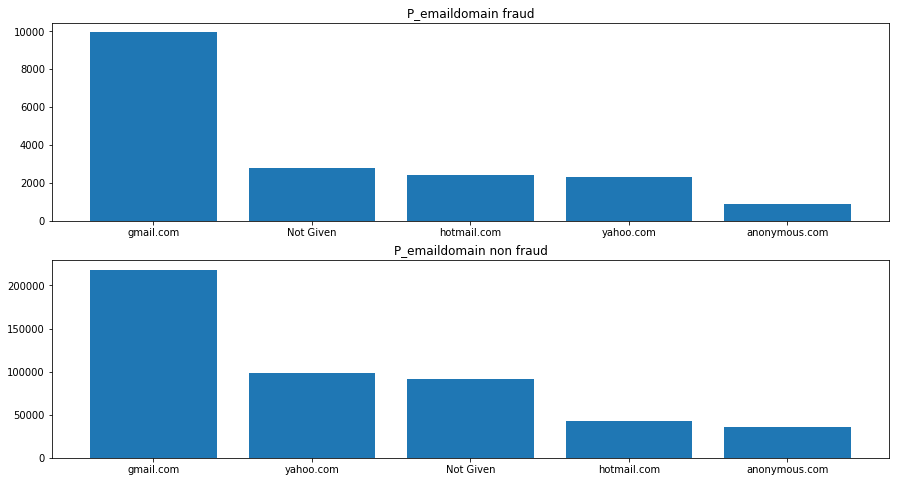

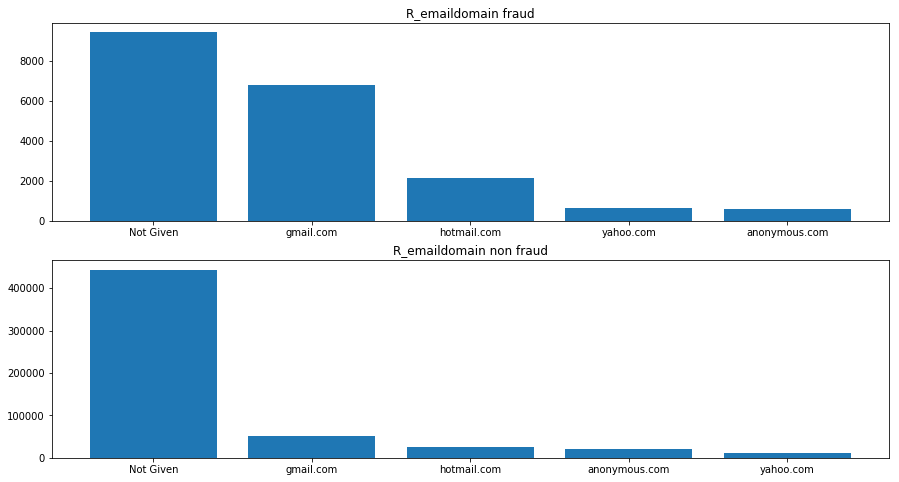

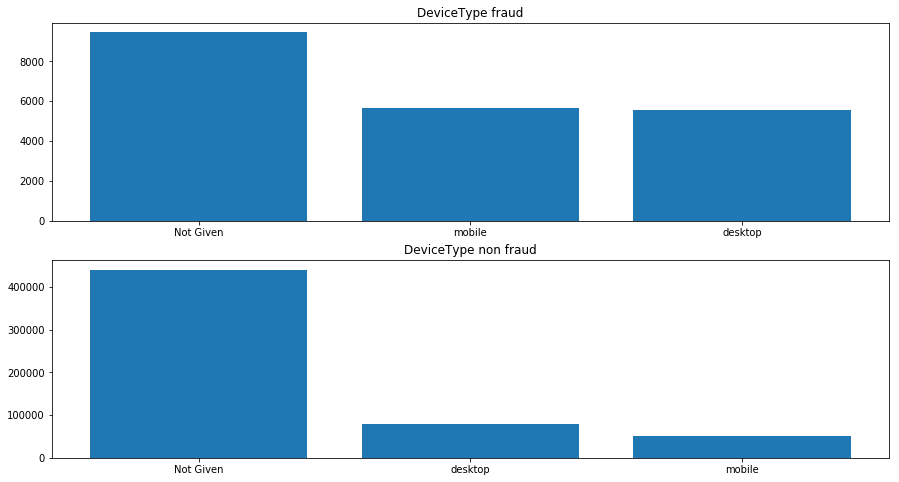

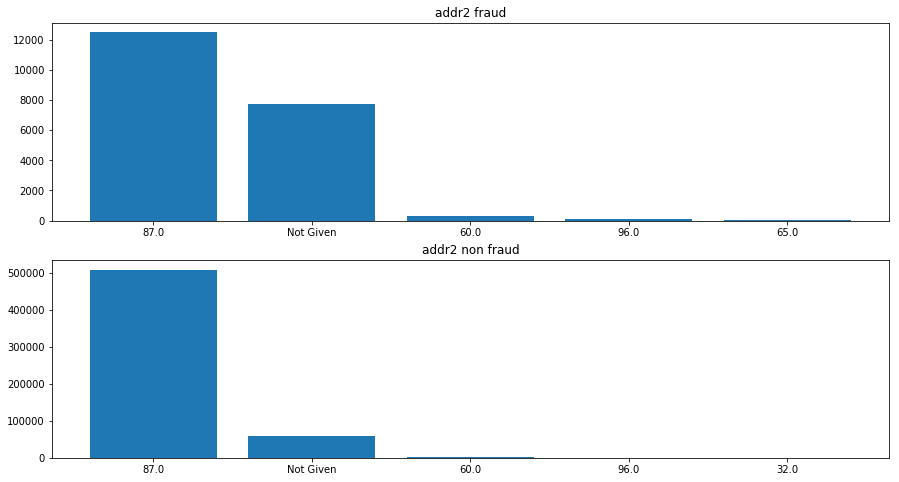

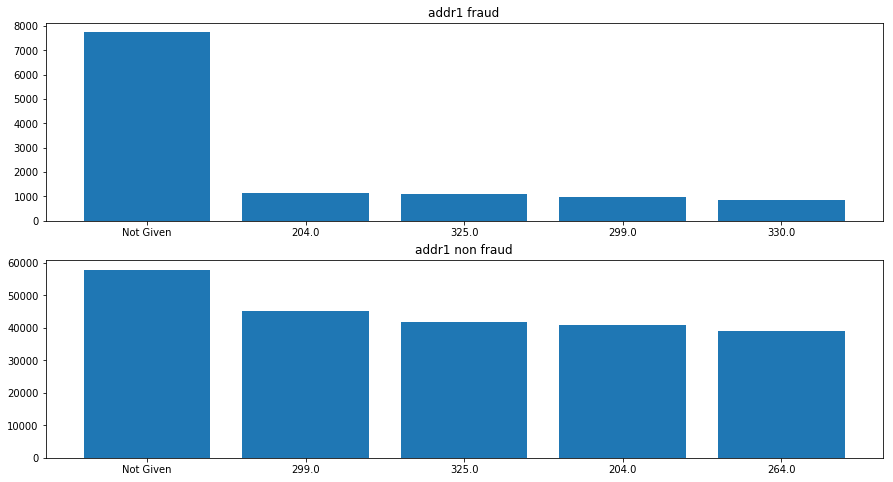

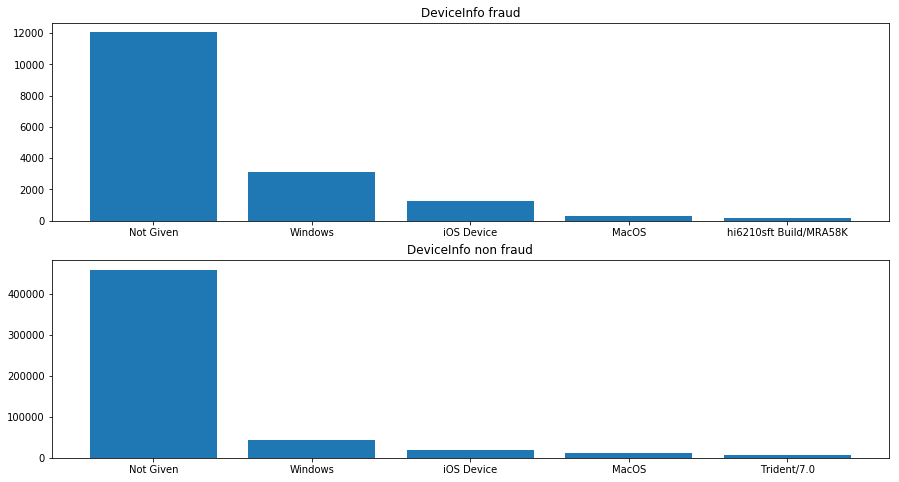

In [0]:
#plotting histograms

from collections import Counter

fraud_dataset = dataset.loc[dataset['isFraud'] == 1]
nonfraud_dataset = dataset.loc[dataset['isFraud'] == 0]


for i in ['card4','card6','ProductCD','P_emaildomain','R_emaildomain','DeviceType','addr2','addr1','DeviceInfo']:
  
  keys_f=[]
  values_f=[]
  keys_nf=[]
  values_nf=[]
  
  counts_f = Counter(fraud_dataset[i]).most_common(5)
  counts_nf = Counter(nonfraud_dataset[i]).most_common(5)
  
  for k in counts_f:
    keys_f.append(str(k[0]))
    
  for v in counts_f:
    values_f.append(v[1])
    
  for k in counts_nf:
    keys_nf.append(str(k[0]))
    
  for v in counts_nf:
    values_nf.append(v[1])

  
  
  fig, feature_plot = mpl.subplots(2,figsize=(15, 8))
  #feature_plot[0].bar(feature_f)
  
  feature_plot[0].bar(keys_f, values_f, align='center')
  feature_plot[0].set_title(i + ' fraud')
  #feature_plot[1].bar(feature_nf)
  
  feature_plot[1].bar(keys_nf, values_nf, align='center')
  feature_plot[1].set_title(i+' non fraud')
 

**Inferences**

***1) card4***

Looking at the plot of card4 of fraudulent and non fraudulent transactions, there is no significant inference that can be drawn from it. 

***2) card6***

The frequency of usage of debit card in non fradulent is significantly greater compared to its usage frequency in fradulent transactions. In other word, credits cards are more prone to fradulent transactions than debit cards.

***3) ProductCD***

The productCD **C** is more likely candidate for fradulent transaction as the frequency of C in fradulent transaction is more compared to its frequency in non fraudulent transactions.

***4) P_emaildomain***

There is no significant inference from this. But ananymous.com, yahoo.com seem to be less prone to fradulent transaction.

***5) R_emaildomain***

The domains gmail and hotmail are prone to fraulent transactions among the known data.

***6) Device_type***

There is no significant inference that could be obtained from this parameter.

***7) addr2***

There is no significant inference that could be obtained from this parameter.

***8) addr1***

There is high chance of the transaction being non-fraudulent if this parameter has a value in the record.

***9) DeviceInfo***

There is no significant inference that could be obtained from this parameter.


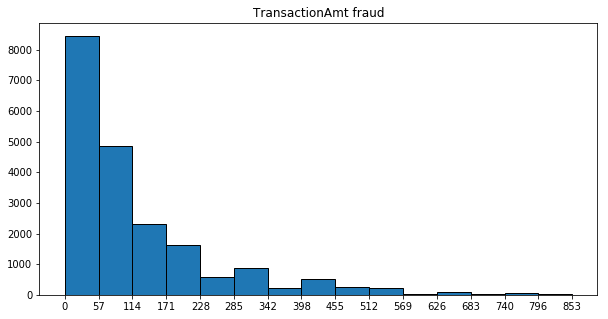

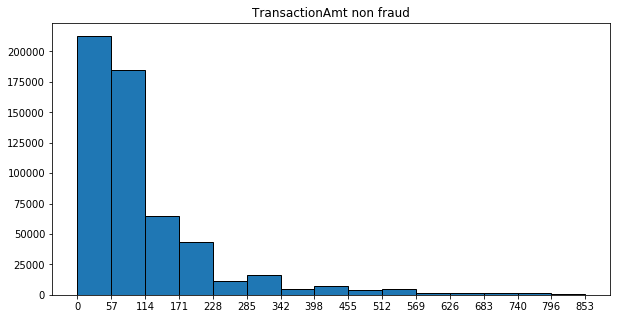

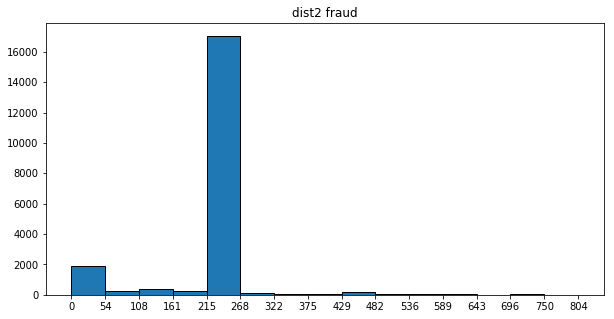

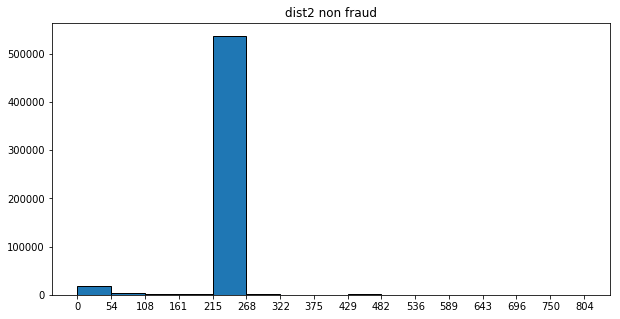

In [0]:
#plotting
import math

fraud_dataset = dataset.loc[dataset['isFraud'] == 1]
nonfraud_dataset = dataset.loc[dataset['isFraud'] == 0]


for i in ['TransactionAmt','dist2']:
  
  
  sd_f=np.std(fraud_dataset[i])
  sd_nf=np.std(nonfraud_dataset[i])
  
  max_f=np.mean(fraud_dataset[i])+3*sd_f
  max_nf=np.mean(nonfraud_dataset[i])+3*sd_nf
  
  bins_f=[]
  bins_nf=[]
  for j in range(16):
    bins_f.append(math.ceil(j*max(max_f,max_nf)/15))
    bins_nf.append(math.ceil(j*max(max_f,max_nf)/15))
    
  mpl.figure(figsize=(10, 5))
  mpl.hist(fraud_dataset[i], bins=bins_f, edgecolor="k")
  mpl.xticks(bins_f)
  mpl.title(i+' fraud')
  mpl.show()
  
  mpl.figure(figsize=(10, 5))
  mpl.hist(nonfraud_dataset[i], bins=bins_f, edgecolor="k")
  mpl.xticks(bins_nf)
  mpl.title(i+' non fraud')
  mpl.show()


**Inference**

***10) TransactionAmt***

There is no significant inference from the transaction amount for fraudulent vs non-fraudulent transaction.

***11) dist2***

There is no significant inference from dist2 while comparing fraudulent and non-fraudulent transactions.

## Part 2 - Transaction Frequency

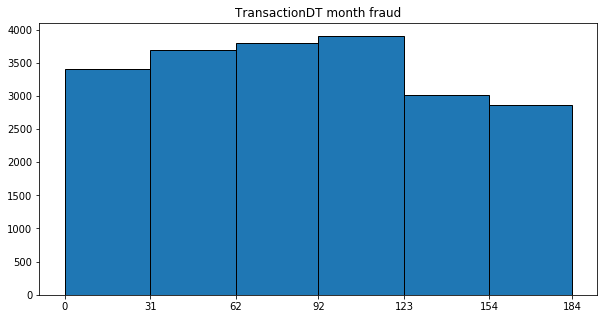

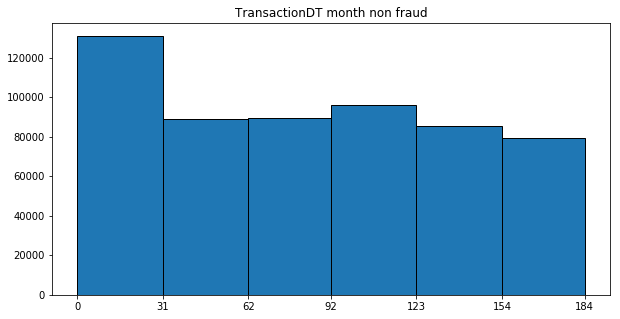

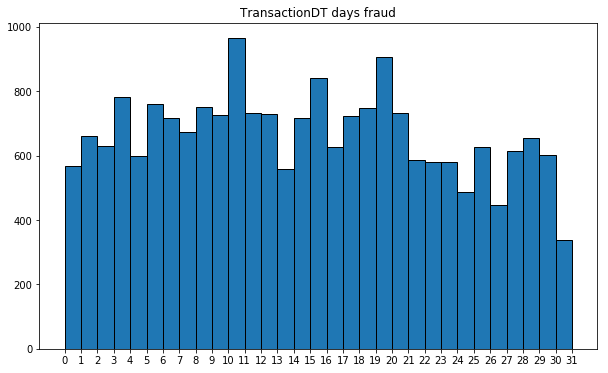

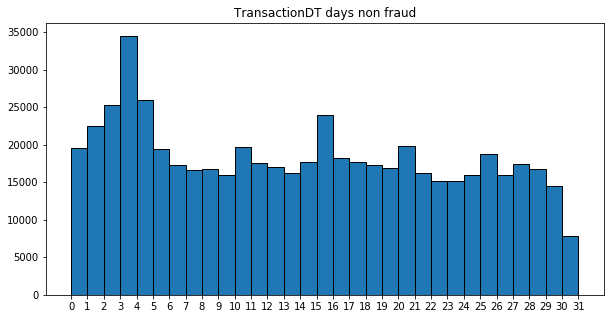

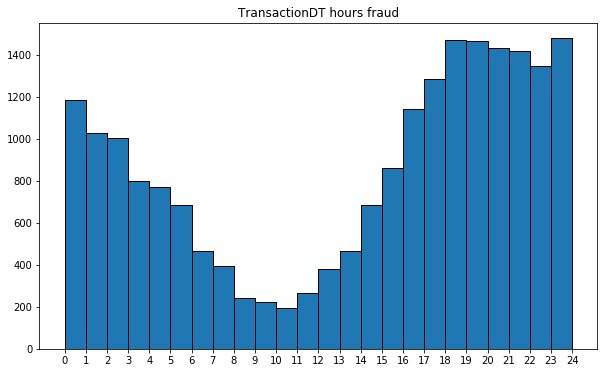

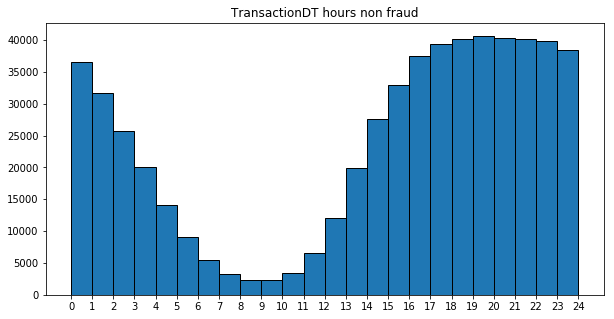

In [0]:
#plotting
import math

fraud_dataset = dataset.loc[dataset['isFraud'] == 1]
nonfraud_dataset = dataset.loc[dataset['isFraud'] == 0]

#TransactionDT Over Months
trans_days_f = fraud_dataset['TransactionDT']/86400
trans_days_nf = nonfraud_dataset['TransactionDT']/86400
bins_f=[]
bins_nf=[]

for j in range(7):
  bins_f.append(math.ceil(j*184/6))
  bins_nf.append(math.ceil(j*184/6))
                   
mpl.figure(figsize=(10, 5))
mpl.hist(trans_days_f, bins=bins_f, edgecolor="k")
mpl.xticks(bins_f)
mpl.title('TransactionDT month'+' fraud')
mpl.show()
  
mpl.figure(figsize=(10, 5))
mpl.hist(trans_days_nf, bins=bins_f, edgecolor="k")
mpl.xticks(bins_nf)
mpl.title('TransactionDT month'+' non fraud')
mpl.show()


#TransactionDT Over days
trans_days_f = fraud_dataset['TransactionDT']/(86400*6)
trans_days_nf = nonfraud_dataset['TransactionDT']/(86400*6)
bins_f=[]
bins_nf=[]

for j in range(32):
  bins_f.append(j)
  bins_nf.append(j)
                   
mpl.figure(figsize=(10, 6))
mpl.hist(trans_days_f, bins=bins_f, edgecolor="k")
mpl.xticks(bins_f)
mpl.title('TransactionDT days'+' fraud')
mpl.show()
  
mpl.figure(figsize=(10, 5))
mpl.hist(trans_days_nf, bins=bins_f, edgecolor="k")
mpl.xticks(bins_nf)
mpl.title('TransactionDT days'+' non fraud')
mpl.show()


#TransactionDT Over hours
trans_days_f = (fraud_dataset['TransactionDT']%(86400))/3600
trans_days_nf = (nonfraud_dataset['TransactionDT']%(86400))/3600
bins_f=[]
bins_nf=[]

for j in range(25):
  bins_f.append(j)
  bins_nf.append(j)
                   
mpl.figure(figsize=(10, 6))
mpl.hist(trans_days_f, bins=bins_f, edgecolor="k")
mpl.xticks(bins_f)
mpl.title('TransactionDT hours'+' fraud')
mpl.show()
  
mpl.figure(figsize=(10, 5))
mpl.hist(trans_days_nf, bins=bins_f, edgecolor="k")
mpl.xticks(bins_nf)
mpl.title('TransactionDT hours'+' non fraud')
mpl.show()

                   

**TransactionDT**

***Analysis:*** Considering the TransactionDT is given in seconds, we can arrive at a stand that the TransactionDT is a span of 6 months. This is because the dividing the TransactionDT by 86400(number of seconds in a day) gives approximately 183 as the max value. This is nothing but 183 days. So from the above stand, we can come to a conclusion that the dataset is transaction details over a span of 6months.

***1) TransactionDT vs Months:***

Non fradulent transactions are more in 1st month and evenly spread over other months. And the fraudulent transactions have occured over the 6 months and almost evenly.

***2) TransactionDT vs Days***

No significant inference from this plot.

***3) TransactionDT vs hours***

Both fradulent and non fraudulent transaction follow a similar pattern, having higher number of transactions in certain hours and lower number of transactions in few hours.

Text(0.5, 1.0, 'addr2 non fraud')

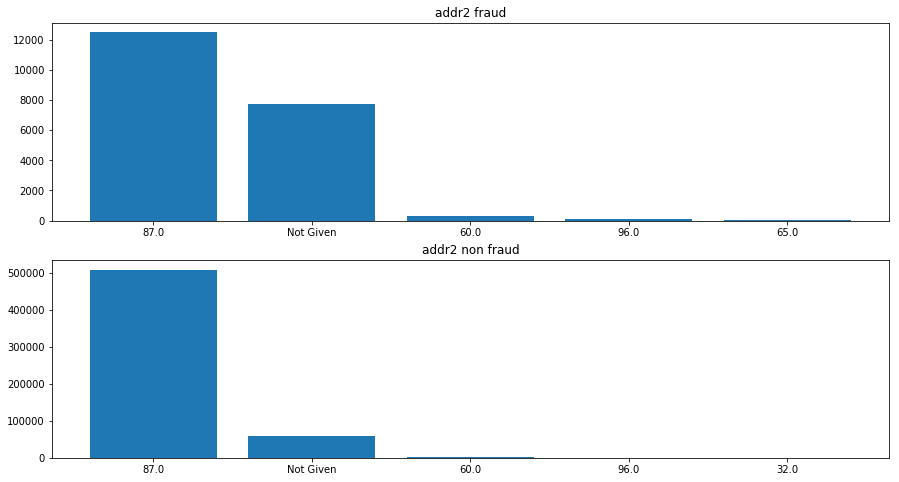

In [0]:
from collections import Counter

fraud_dataset = dataset.loc[dataset['isFraud'] == 1]
nonfraud_dataset = dataset.loc[dataset['isFraud'] == 0]

keys_f=[]
values_f=[]
keys_nf=[]
values_nf=[]
  
counts_f = Counter(fraud_dataset['addr2']).most_common(5)
counts_nf = Counter(nonfraud_dataset['addr2']).most_common(5)
  
for k in counts_f:
  keys_f.append(str(k[0]))
    
for v in counts_f:
  values_f.append(v[1])
    
for k in counts_nf:
  keys_nf.append(str(k[0]))
    
for v in counts_nf:
  values_nf.append(v[1])
  
fig, feature_plot = mpl.subplots(2,figsize=(15, 8))

  
feature_plot[0].bar(keys_f, values_f, align='center')
feature_plot[0].set_title('addr2' + ' fraud')
  
feature_plot[1].bar(keys_nf, values_nf, align='center')
feature_plot[1].set_title('addr2'+' non fraud')

**Relation between addr2 and TransactionDT**

***Analysis:*** Assuming that people do not carry out transactions during night, we can state that lower number of transactions are the night hours.Comparing the addr plot and the hourly plot of TransactionDT, we can say that the country with the country code 87 and few more countries contributing to plot might have the waking hours in range 12th to 15th hour of the plot of hourly plot of TransactionDT. 

## Part 3 - Product Code

In [0]:
classifier_dataset=dataset.iloc[:,4:6]
classifier_dataframe=pd.DataFrame(classifier_dataset)
productcd_mean_dataset=classifier_dataframe.groupby(classifier_dataframe['ProductCD']).aggregate(np.mean)

productcd_mean_dataset

,TransactionAmt
ProductCD,
C,42.872353
H,73.170058
R,168.306188
S,60.269487
W,153.158554


In [0]:
from collections import Counter
import seaborn as sns

classifier_dataset=dataset.iloc[:,4:6]

sd_trans=np.std(classifier_dataset['TransactionAmt'])
max_trans=np.mean(classifier_dataset['TransactionAmt'])+sd_trans*3
bins_trans=[]

for j in range(5):
  bins_trans.append(math.ceil(j*max_trans/4))

classifier_dataframe=pd.DataFrame(classifier_dataset)
grouped_classifier=classifier_dataframe.groupby([pd.cut(classifier_dataframe.TransactionAmt, bins_trans),classifier_dataframe['ProductCD']]).count()

grouped_classifier

TransactionAmt
TransactionAmt ProductCD                
(0, 214]       C                 68065.0
               H                 32057.0
               R                 30721.0
               S                 11313.0
               W                366426.0
(214, 427]     C                   448.0
               H                   756.0
               R                  5214.0
               S                   202.0
               W                 44835.0
(427, 640]     C                     4.0
               H                   211.0
               R                  1103.0
               S                    73.0
               W                 14055.0
(640, 853]     C                     2.0
               H                     NaN
               R                   238.0
               S                    21.0
               W                  4711.0

**Product Code Analysis**

***Code1 Analysis:*** The means of the ProductCD shows R and W as the high price transactions and C and W as low price transactions. 

***Code2 Analysis:***

The products are grouped in nested levels, the first level bucketizes the products into 4 buckets with respect to TransactionAmt and the next groupping is on the ProductCD. So the table depicts the number of products of a ProductCD in a TransactionAmt bucket. By looking at the above table we can observe the following.

***1) ProductCD  'C':*** A high frequency of products with ProductCD C is in the low price. C is mostly in the range 0-100.

***2) ProductCD  'H':*** This mostly occupies low price range mostly between 0-200.

***3) ProductCD 'R':*** Many products are in the medium price range mostly between 0-500.

***4) ProductCD 'S':*** This mostly occupies low price range mostly between 0-200.

***5)ProductCD W:*** This mostly occupies the entire prie range. Most of the products below to 0-300 range  


***From the above observation, we can conclude that***

1) Most of the products in price range 0-96 or the lower price products belong to **C** and **W**.

2) Most of the products in the higher price range belong to ProductCD **W**.

## Part 4 - Correlation Coefficient

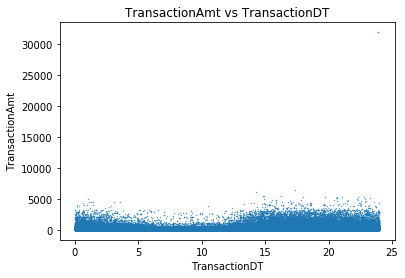

In [0]:
corr_dataset=dataset.iloc[:,3:5]
corr_dataset['TransactionDT']=(corr_dataset['TransactionDT']%86400)/3600;
area = np.pi/25

mpl.scatter(corr_dataset['TransactionDT'], corr_dataset['TransactionAmt'], s=area)
mpl.title('TransactionAmt vs TransactionDT')
mpl.ylabel('TransactionAmt')
mpl.xlabel('TransactionDT')
mpl.show()

In [0]:
# Pearson coefficient
import pandas as pd

corr_dataset=dataset.iloc[:,3:5]
corr_dataset['TransactionDT']=(corr_dataset['TransactionDT']%86400)/3600;
corr_dataset.corr(method ='pearson') 


,TransactionDT,TransactionAmt
TransactionDT,1.000000,0.044571
TransactionAmt,0.044571,1.000000


In [0]:
# Spearman coefficient
import pandas as pd

corr_dataset=dataset.iloc[:,3:5]
corr_dataset['TransactionDT']=(corr_dataset['TransactionDT']%86400)/3600;
corr_dataset.corr(method ='spearman') 

,TransactionDT,TransactionAmt
TransactionDT,1.00000,0.03809
TransactionAmt,0.03809,1.00000


**Observed Correlation:**

Pearson correlation: .044571

Pearrman correlation: .03809

## Part 5 - Interesting Plot

In [0]:
#plotting
import math


i_dataset = pd.merge(identities[['TransactionID', 'DeviceType','DeviceInfo']], transactions[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','isFraud']],on='TransactionID',how='outer')

i_fraud_dataset = i_dataset.loc[dataset['isFraud'] == 1]
i_nonfraud_dataset = i_dataset.loc[dataset['isFraud'] == 0]

#TransactionDT Over Months
i_dataset['TransactionDT']=(i_dataset['TransactionDT']%(86400))/3600
i_fraud_dataset['TransactionDT']=(i_fraud_dataset['TransactionDT']%(86400))/3600
i_nonfraud_dataset['TransactionDT'] = (i_nonfraud_dataset['TransactionDT']%(86400))/3600

i_fraud_dataset['TransactionDT'] = i_fraud_dataset['TransactionDT'].round()
i_nonfraud_dataset['TransactionDT'] = i_nonfraud_dataset['TransactionDT'].round()
i_dataset['TransactionDT'] = i_dataset['TransactionDT'].round()

productPrice = i_dataset[["TransactionDT","TransactionAmt"]]
pCodeList = productPrice["TransactionDT"].unique()
df=pd.DataFrame(productPrice.groupby('TransactionDT').aggregate(np.mean))

  

Text(0, 0.5, 'Average transaction amt')

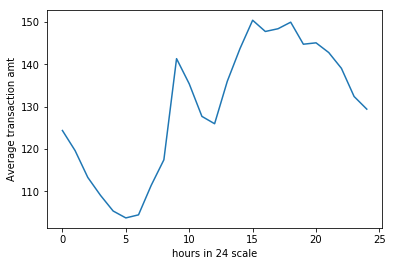

In [0]:


mx=pd.DataFrame({'hour':df.TransactionAmt.index, 'Price mean':df.TransactionAmt.values})

mpl.plot(mx['hour'],mx['Price mean'])
mpl.xlabel('hours in 24 scale')
mpl.ylabel('Average transaction amt')

**Analysis**

Considering the above plot vs the earlier analysis of the waking up hours and sleep hours of people, we can arrive at the mean transaction amount in different times of the day.

The above is a plot depicting the average amount spent on transaction during different hours of a day. 

Our earlier prediction was the following.

a) Sleep hours: Between 6-14

b) Waking time: 13-15

c) Evening time: 4-6

Comparing the above plot with the observations on the sleeping and wake up hours , we can arrive at the following observations.

1) Transaction amount during evenings is less.

2) The high price transactions usually happen during the first half of the day.

3) The transactions that take place during night have fluctuating prices.


## Part 6 - Prediction Model

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
total_dataset = pd.merge(identities, transactions,on='TransactionID',how='outer')
del total_dataset['DeviceInfo']
cat_columns = list(total_dataset.select_dtypes(include=['object']).columns)
non_cat_columns = list(total_dataset.select_dtypes(exclude=['object']).columns)

for i in cat_columns:
  total_dataset[i].fillna('Not Given',inplace=True)

for i in non_cat_columns:
  total_dataset[i].fillna((total_dataset[i].mean()), inplace=True) 
  
total_dataset['TransactionDT']=(total_dataset['TransactionDT']%86400)/3600;

total_dataset=pd.get_dummies(total_dataset, columns=cat_columns, drop_first=True)


In [0]:
corr_matrix=total_dataset[total_dataset.columns[1:]].corr()['isFraud'][:-1]
corr_df=pd.DataFrame({'Cols':corr_matrix.index, 'Corrs':corr_matrix.values})
corr_df['Corrs'] = corr_df['Corrs'].abs()

In [0]:
top_corr=corr_df.sort_values('Corrs', ascending=False).head(20).iloc[1:,:]
final_cols=top_corr['Cols'].tolist()
final_cols.append('isFraud')
total_dataset=total_dataset[final_cols]

In [0]:
train_data, test_data, train_label, test_label = train_test_split(total_dataset.iloc[:,total_dataset.columns != 'isFraud'], total_dataset.iloc[:,total_dataset.columns == 'isFraud'], test_size = 0.2, random_state = 0)

In [0]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
clf = LogisticRegression(solver='lbfgs')
clf.fit(train_data, train_label)
preds = clf.predict(test_data)

print("Predicting if the talk is related to Technology using a Logistic Regression classifier:")
print("\nThe classifier's accuracy is... drum roll\n\n%s percent!\n" % round(100*accuracy_score(test_label, preds), 2))'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

clf=LogisticRegression(solver='lbfgs')
clf.fit(train_data,train_label)
preds=clf.predict(test_data)

print("Predicting if the talk is related to Technology using a Logistic Regression classifier:")
print("\nThe classifier's accuracy is... drum roll\n\n%s percent!\n" % round(100*accuracy_score(test_label, preds), 2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting if the talk is related to Technology using a Logistic Regression classifier:

The classifier's accuracy is... drum roll

96.86 percent!



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


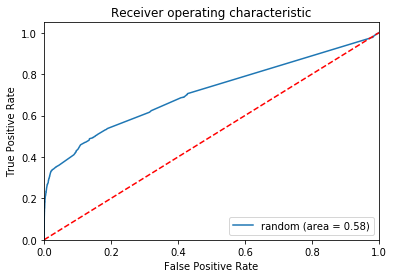

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(test_label, preds)
fpr, tpr, thresholds = roc_curve(test_label, clf.predict_proba(test_data)[:,1])
mpl.figure()
mpl.plot(fpr, tpr, label='random (area = %0.2f)' % roc_auc)
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0.0, 1.0])
mpl.ylim([0.0, 1.05])
mpl.xlabel('False Positive Rate')
mpl.ylabel('True Positive Rate')
mpl.title('Receiver operating characteristic')
mpl.legend(loc="lower right")
mpl.savefig('Log_ROC')
mpl.show()

In [0]:
sub_transactions = pd.read_csv('/content/drive/My Drive/dsf_hw2/test_transaction.csv')
sub_identities = pd.read_csv('/content/drive/My Drive/dsf_hw2/test_identity.csv')


sub_total_dataset = pd.merge(sub_identities, sub_transactions,on='TransactionID',how='outer')
del sub_total_dataset['DeviceInfo']
sub_cat_columns = list(sub_total_dataset.select_dtypes(include=['object']).columns)
sub_non_cat_columns = list(sub_total_dataset.select_dtypes(exclude=['object']).columns)

for i in sub_cat_columns:
  sub_total_dataset[i].fillna('Not Given',inplace=True)

for i in sub_non_cat_columns:
  sub_total_dataset[i].fillna((sub_total_dataset[i].mean()), inplace=True) 
  
sub_total_dataset['TransactionDT']=(sub_total_dataset['TransactionDT']%86400)/3600;

sub_total_dataset=pd.get_dummies(sub_total_dataset, columns=cat_columns, drop_first=True)

final_cols.remove('isFraud')

sub_total_dataset=sub_total_dataset[final_cols]

#missing_cols = set( final_cols) - set( sub_total_dataset.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    sub_total_dataset[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
sub_total_dataset = sub_total_dataset[train_data.columns]

sub_preds = clf.predict(sub_total_dataset)

In [0]:
submission = pd.read_csv('/content/drive/My Drive/dsf_hw2/sample_submission.csv')
submission['isFraud']=sub_preds
submission.to_csv('sub2.csv', header=False, index=False)

**Steps followed**

1) I tried to merge the two data sets given to form a master table.

2) Removed the column with name 'DeviceInfo' as there was no significant inference from it and it caused issues with labelling.

3) Classified the columns as numeric and non numeric columns and appied suitable methods to fill the missing values.

4) Obtained the correlation of every column with the 'isFraud' column and make a note of most correlated columns as **most_correlated**.

5) Seggregate the entire data to training and test data.

6) Train on **most_correlated** columns of the training data using logestic regression classifier.

7) Test the model by predicting on the test data and finding accurancy and area under curve.

8) Predict on the submission data.